In [1]:
NAME = "AMANJOT KANDHOLA"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [4]:
# Merging datasets
df = pd.concat([df_data, df_target], axis=1)

# Display the first 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
'''Before proceeding with regression, first check 
if there are any missing values'''
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

Text(0.5, 1.0, 'Petal Width vs Petal Length')

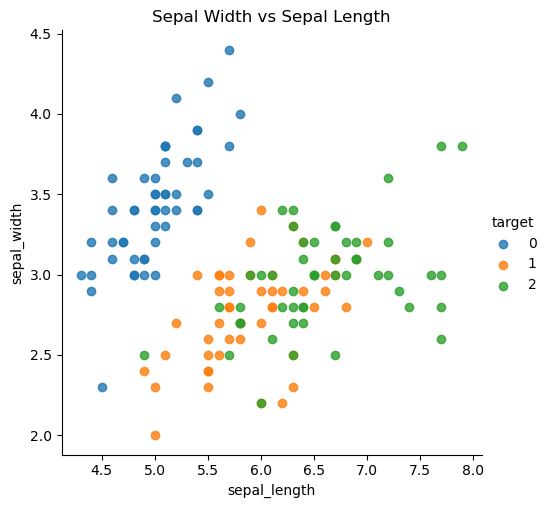

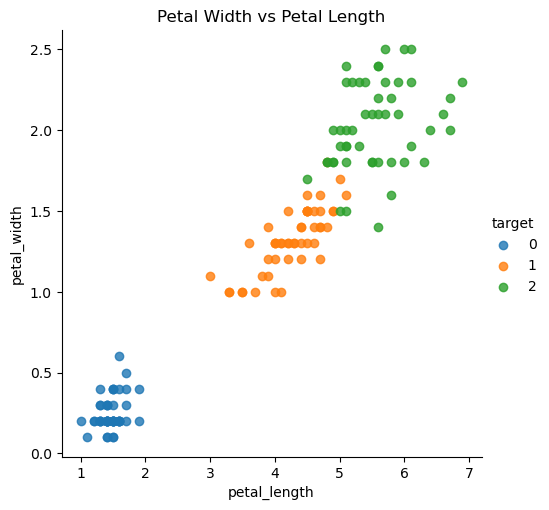

In [8]:
# Scatter plots

sns.lmplot(x= 'sepal_length', y= 'sepal_width', data= df, fit_reg= False, hue='target')
plt.title('Sepal Width vs Sepal Length')

sns.lmplot(x= 'petal_length', y= 'petal_width', data =df, fit_reg= False, hue='target')
plt.title('Petal Width vs Petal Length')


## Prepare the data for classification

In [9]:
X= df.drop(columns='target')
y= df['target']

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

## Split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Run the fit

In [13]:
# Training
knn_clf = KNeighborsClassifier(n_neighbors= 5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Testing
import warnings
#y_pred = knn_clf.predict(X_test)
# Here I am ignoring a warning generated because of change in the default behavior of the mode function in SciPy's current version
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    y_pred = knn_clf.predict(X_test)

## predict the class from features

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9333333333333333

In [16]:
#Correct and wrong predictions
correct = np.count_nonzero(y_pred == y_test)
wrong = np.count_nonzero(y_pred != y_test)
print("Correct ones:", correct)
print("Incorrect ones:", wrong)

Correct ones: 28
Incorrect ones: 2


Text(0.5, 1.0, 'Accuracy Score for Different Values of k')

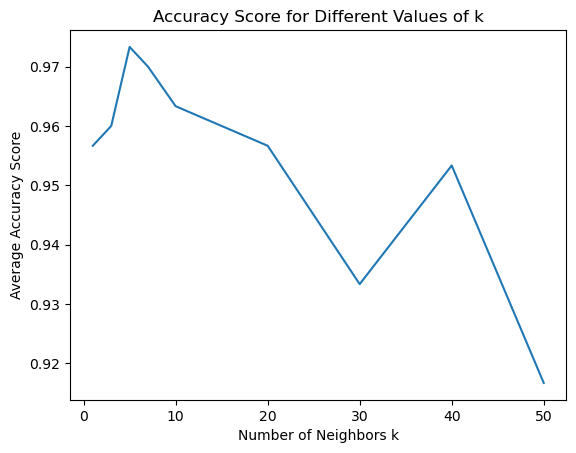

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

k_list =[1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracy_scores=[]
correct_predictions=[]

for i in k_list:
    accuracy_scoresk=[]
    correct_predictionsk=[]
    for _ in range(10):
        X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)
        knn_clf = KNeighborsClassifier(n_neighbors= i)
        knn_clf.fit(X_train, y_train)
        y_pred= knn_clf.predict(X_test)
        accuracy_scoresk.append(accuracy_score(y_pred, y_test))
        correct_predictionsk.append(np.count_nonzero(y_pred == y_test))
    accuracy_scores.append(np.mean(accuracy_scoresk))
    correct_predictions.append(np.mean(correct_predictionsk))
plt.plot(k_list, accuracy_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Average Accuracy Score')
plt.title('Accuracy Score for Different Values of k')

From the graph, we can see that as k increases, the model becomes more stable but might lose some accuracy due to averaging over more neighbors

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_val_score

# Perform cross-validation with k=5
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X, y, cv=10)

print(f"Cross-validated accuracy: {np.mean(cv_scores)}")


Cross-validated accuracy: 0.9666666666666668
